# if I had more time list
I would trt to figure out the spatial features and why they arn't scaled correctly.
and if slides say 32 why only a few show up

I would do a liniar regression model sqft vs

In [65]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

In [66]:
!pip install lightgbm
!pip install scikit-optimize

In [67]:
sfr_df = pd.read_csv("/content/sfr_cleaned_only_important_columns.csv")
sfr_df.head()

,Bedrooms,Total Baths,SqFt,Acres,Sold Price,List Year,List Month,Age of Property,Rate,Lat,...,City_Raleigh,City_Rocky Mount,City_Sanford,City_Selma,City_Smithfield,City_Wake Forest,City_Wendell,City_Willow Springs,City_Youngsville,City_Zebulon
0,3,1,-1.569749,-0.160903,54000,1,2,2.043593,-1.029184,-0.753785,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,3,2,-1.096891,-0.160903,57500,0,12,1.509363,-1.115292,0.241470,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1,-1.626796,-0.160903,60000,1,2,2.488785,-1.115292,0.605112,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1,-1.482277,-0.160903,62000,1,3,2.132632,-1.023443,-0.803133,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,1,0.109973,-0.160903,63000,0,11,1.954555,-1.258804,0.620745,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
sfr_df.corr()["Sold Price"].sort_values().tail(10)

,Sold Price
City_Apex,0.156529
List Year,0.185012
Rate,0.186384
City_Chapel Hill,0.204593
City_Cary,0.220977
Bedrooms,0.484341
Total Baths,0.622471
SqFt,0.750650
Sold Price,1.000000
spatial_feature_8,NaN


<Axes: >

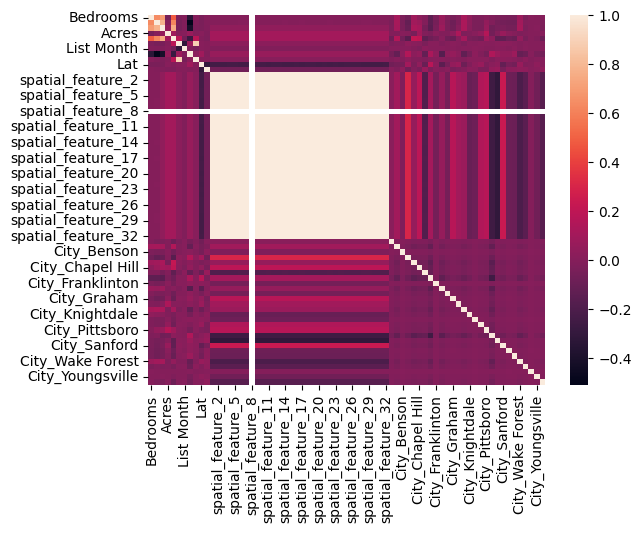

In [69]:
import seaborn as sns
sns.heatmap(sfr_df.corr())

In [70]:
sfr_df.spatial_feature_32

,spatial_feature_32
0,23834.453
1,20205.154
2,29039.096
3,28494.967
4,28953.160
...,...
53559,26263.470
53560,26275.764
53561,23969.654
53562,27367.184


In [71]:
sfr_df.spatial_feature_29

,spatial_feature_29
0,23860.238
1,20233.799
2,29048.160
3,28511.510
4,28962.322
...,...
53559,26281.105
53560,26293.260
53561,23990.475
53562,27381.152


In [72]:
X = sfr_df.drop(columns='Sold Price')
y = sfr_df['Sold Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

In [73]:
from skopt.space import Real, Integer, Categorical
# defining parameters
params = {

    'num_leaves': Integer(20, 50),
    'learning_rate': Real(0.01, 0.1, 'log-uniform'),
    'n_estimators': Integer(50, 500),
    'max_depth': Integer(3, 10),
    'metric': Categorical(['l1', 'l2', 'rmse']),
    'min_child_samples': Integer(10, 200),

}

In [74]:
# Define LightGBM model
import lightgbm as lgb
lgbm = lgb.LGBMRegressor(objective='regression')




In [75]:
!pip install scikit-optimize

In [76]:
from skopt import BayesSearchCV
#Set up BayesSearchCV
bayes_search = BayesSearchCV(estimator=lgbm, search_spaces=params, cv=5, n_iter=30,scoring='neg_mean_squared_error', random_state=42)

In [77]:
#Train the LightGBM model
bayes_search.fit(X_train, y_train)


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

BayesSearchCV(cv=5, estimator=LGBMRegressor(objective='regression'), n_iter=30,
              random_state=42, scoring='neg_mean_squared_error',
              search_spaces={'learning_rate': Real(low=0.01, high=0.1, prior='log-uniform', transform='normalize'),
                             'max_depth': Integer(low=3, high=10, prior='uniform', transform='normalize'),
                             'metric': Categorical(categories=('l1', 'l2', 'rmse'), prior=None),
                             'min_child_samples': Integer(low=10, high=200, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=50, high=500, prior='uniform', transform='normalize'),
                             'num_leaves': Integer(low=20, high=50, prior='uniform', transform='normalize')})

In [78]:
#Evaluate the model
best_model = bayes_search.best_estimator_
best_model

LGBMRegressor(max_depth=9, metric='l2', min_child_samples=10, n_estimators=500,
              num_leaves=50, objective='regression')

In [79]:
bayes_search.score(X_test, y_test)


-3571206253.8192706

In [80]:
# Make predictions with testing data
y_pred = best_model.predict(X_test)

# Calculate MSE and RMSE, and MAE
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mse**(0.5)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse)
print("MAE: %.2f" % mae)


MSE: 3571206253.82
RMSE: 59759.57
MAE: 40862.68
